1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + `features_1`
  + `features_2`
  + `features_3`
  
Are these features correlated? Please add a comment.

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from pandas.plotting import scatter_matrix
import urllib.request
import pickle
from scipy.stats import norm
from scipy.integrate import trapz
import seaborn as sns


Correlation matrix: 
            features_1  features_2  features_3
features_1     1.00000    -0.00522     0.02369
features_2    -0.00522     1.00000     0.04736
features_3     0.02369     0.04736     1.00000


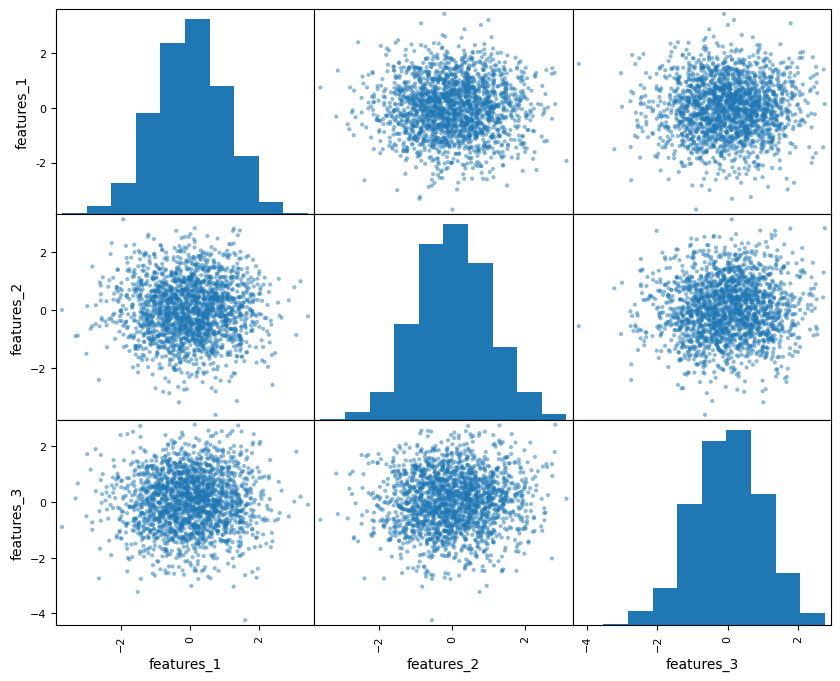

In [122]:
# Corrected Dropbox direct link to the CSV file
url = "https://dl.dropboxusercontent.com/s/aamg1apjhclecka/regression_generated.csv"

# Use pandas to read the CSV file directly from the URL
df = pd.read_csv(url)

# Now, you can work with the DataFrame 'df' as needed
# For example, you can display the first few rows of the DataFrame
# print(df.head())

#Selected features
selected_features = ['features_1', 'features_2', 'features_3']

#Dataframe with selected features
df_subset = df[selected_features]

#Creating the scatter plot 
scatter_matrix(df_subset, figsize=(10, 8), alpha = 0.5)

#Displaying the correlation matrix
correlation_matrix = df_subset.corr()
print('Correlation matrix: ')
print(correlation_matrix)

#Showing the plot
plt.show()

# Based on the absolute values of the correlation coefficients, it seems like features have very weak correlations.
# The values are close to zero, this means that it is little to no linear relationship between these features. 


2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

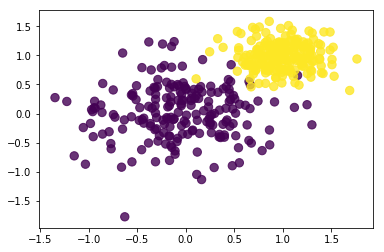

In [129]:
from IPython.display import Image
Image('two_categories_scatter_plot.png')

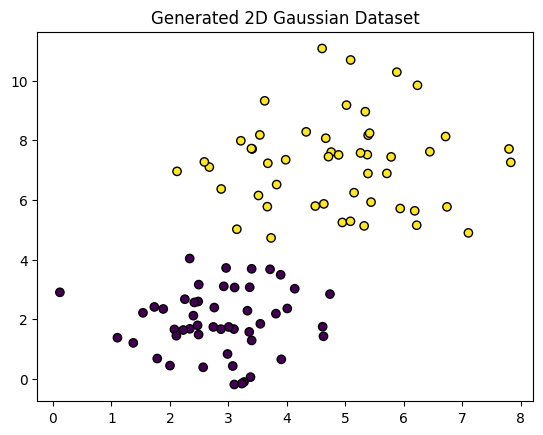

In [ ]:
# Set seed for reproducibility
np.random.seed(42)

# Number of samples per category
num_samples_per_cat = 50

# Define means and standard deviations
mean_cat_1 = (3, 2)
std_cat_1 = (1.1, 1.1)

mean_cat_2 = (5, 7)
std_cat_2 = (1.5, 1.5)

# Generate samples for the first category
cat_1 = np.random.normal(loc=mean_cat_1, scale=std_cat_1, size=(num_samples_per_cat, 2))

# Generate samples for the second category
cat_2 = np.random.normal(loc=mean_cat_2, scale=std_cat_2, size=(num_samples_per_cat, 2))

# Concatenate the two categories to create the final dataset
X = np.vstack([cat_1, cat_2])

# Create labels (0 for cat_1, 1 for cat_2)
y = np.concatenate([np.zeros(num_samples_per_cat), np.ones(num_samples_per_cat)])

# Plot the generated dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k')
plt.title('Generated 2D Gaussian Dataset')
plt.show()



3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

Data printed: {'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
        0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}
Type of data: <class 'numpy.ndarray'>
Data flatten: [{'residuals': array([ 1.1       , -1.95      , -7.2       , ...,  0.08333333,
         0.16666667,  0.08333333]), 'distances': array([16. ,  6.3,  3.4, ...,  1.7, 19.1,  2.6])}]


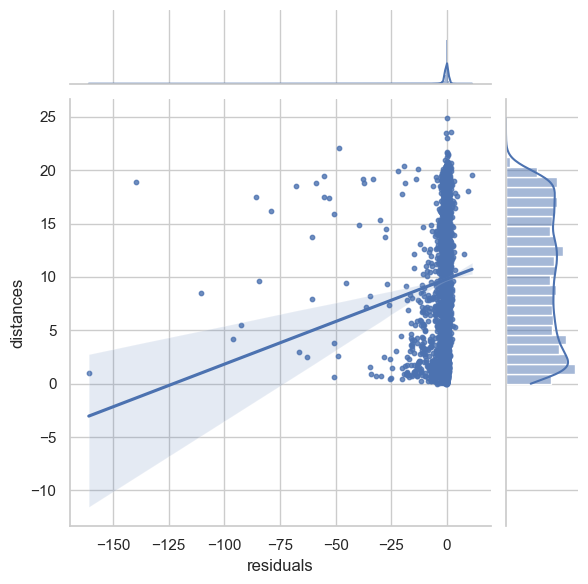

Bin centers: [ 0.1245  0.3735  0.6225  0.8715  1.1205  1.3695  1.6185  1.8675  2.1165
  2.3655  2.6145  2.8635  3.1125  3.3615  3.6105  3.8595  4.1085  4.3575
  4.6065  4.8555  5.1045  5.3535  5.6025  5.8515  6.1005  6.3495  6.5985
  6.8475  7.0965  7.3455  7.5945  7.8435  8.0925  8.3415  8.5905  8.8395
  9.0885  9.3375  9.5865  9.8355 10.0845 10.3335 10.5825 10.8315 11.0805
 11.3295 11.5785 11.8275 12.0765 12.3255 12.5745 12.8235 13.0725 13.3215
 13.5705 13.8195 14.0685 14.3175 14.5665 14.8155 15.0645 15.3135 15.5625
 15.8115 16.0605 16.3095 16.5585 16.8075 17.0565 17.3055 17.5545 17.8035
 18.0525 18.3015 18.5505 18.7995 19.0485 19.2975 19.5465 19.7955 20.0445
 20.2935 20.5425 20.7915 21.0405 21.2895 21.5385 21.7875 22.0365 22.2855
 22.5345 22.7835 23.0325 23.2815 23.5305 23.7795 24.0285 24.2775 24.5265
 24.7755]


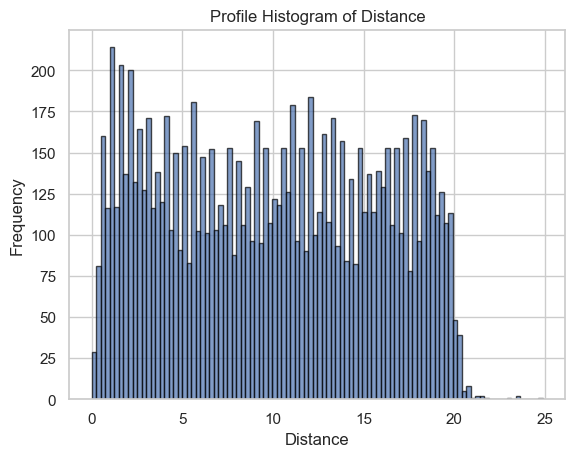

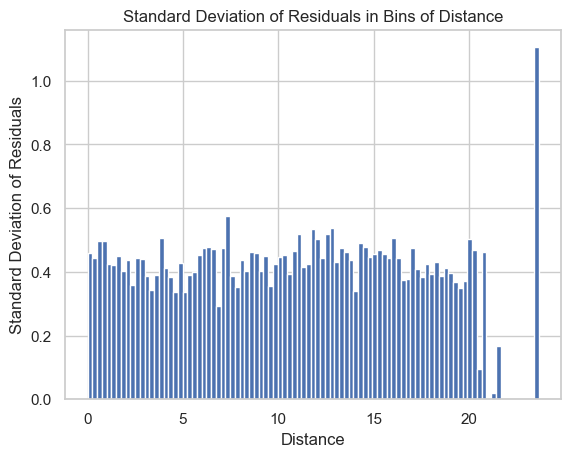

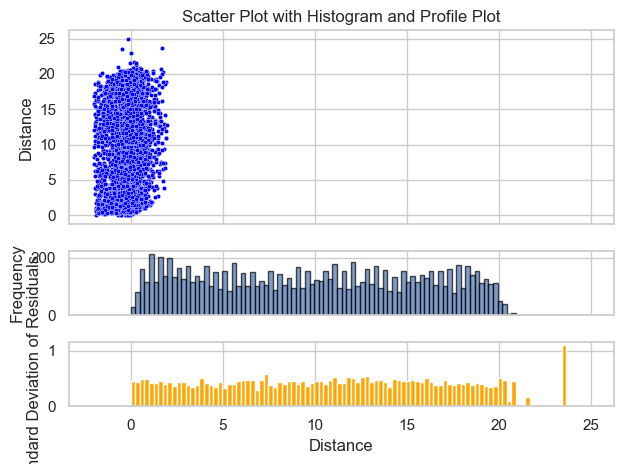

In [202]:
#I did not understand this task, as you will see... But i tried to explain what i was thinking through the script, so hope 
#this is not too bad

#Loading the file
file = 'residuals_261.pkl'

with open(file, 'rb') as f:
    data = pickle.load(f)

#Printing and inspecting the dataset and finding two features: 'residuals' and 'distances'
print(f'Data printed: {data}')

data_type = type(data)

# Print the type and content of the loaded data
print(f"Type of data: {type(data)}")

data_flatten = data.flatten()
print(f"Data flatten: {data_flatten}")

scalar_value = data.item()

df = pd.DataFrame(scalar_value)

residuals = df['residuals']
distances = df['distances']

#Cleaning the sample by selecting the entries with absolute values of "residuals" smaller than 2
df_cleaned = df[abs(residuals) < 2]

#Plotting a Seaborn jointplot with linear regression
sns.set(style="whitegrid")
plot = sns.jointplot(x='residuals', y='distances', data=df, kind='reg', scatter_kws={'s': 10})

#Showing the plot
plt.show()

#The line got a positive slope, this indicates a positive correlation, but the regression points are quite far from the line,
#this inicated a weak correlation.

# Creating the histogram using cleaned data
num_bins = 100
hist, bin_edges = np.histogram(df_cleaned['distances'], bins=num_bins)

# Array with bin-centers
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
print(f'Bin centers: {bin_centers}')

# Plotting the histogram
plt.hist(df_cleaned['distances'], bins=num_bins, edgecolor='black', alpha=0.7)

#Labels and title
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.title('Profile Histogram of Distance')

#Showing the plot
plt.show()

# Calculate the standard deviation of residuals in each bin
bin_std_dev = []
for i in range(num_bins):
    # Find indices of residuals in the current bin
    indices = np.where((df_cleaned['distances'] >= bin_edges[i]) & (df_cleaned['distances'] < bin_edges[i + 1]))
    # Calculate standard deviation of residuals in the current bin
    std_dev = np.std(df_cleaned['residuals'].iloc[indices])
    bin_std_dev.append(std_dev)

# Plot the standard deviation of residuals
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
plt.bar(bin_centers, bin_std_dev, width=bin_edges[1] - bin_edges[0])

# Add labels and title
plt.xlabel('Distance')
plt.ylabel('Standard Deviation of Residuals')
plt.title('Standard Deviation of Residuals in Bins of Distance')

# Show the plot
plt.show()

#Doing the same in subplots
fig, (scatter_ax, hist_ax, profile_ax) = plt.subplots(nrows=3, sharex=True, gridspec_kw={'height_ratios': [3, 1, 1]})

# Plotting a scatter plot, not sure if i was suppose to to this or the other
sns.scatterplot(x='residuals', y='distances', data=df_cleaned, ax=scatter_ax, color='blue', s=10)
scatter_ax.set_ylabel('Distance')
scatter_ax.set_title('Scatter Plot with Histogram and Profile Plot')

# Creating the histogram using cleaned data
hist, bin_edges = np.histogram(df_cleaned['distances'], bins=num_bins)

# Plotting the histogram
hist_ax.hist(df_cleaned['distances'], bins=num_bins, edgecolor='black', alpha=0.7)
hist_ax.set_ylabel('Frequency')

# Calculate the standard deviation of residuals in each bin
bin_std_dev = []
for i in range(num_bins):
    # Find indices of residuals in the current bin
    indices = np.where((df_cleaned['distances'] >= bin_edges[i]) & (df_cleaned['distances'] < bin_edges[i + 1]))
    # Calculate standard deviation of residuals in the current bin
    std_dev = np.std(df_cleaned['residuals'].iloc[indices])
    bin_std_dev.append(std_dev)

# Plotting the profile plot
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
profile_ax.bar(bin_centers, bin_std_dev, width=bin_edges[1] - bin_edges[0], color='orange')
profile_ax.set_xlabel('Distance')
profile_ax.set_ylabel('Standard Deviation of Residuals')

# Adjust layout to prevent clipping of labels
plt.tight_layout()

# Show the plot
plt.show()



4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


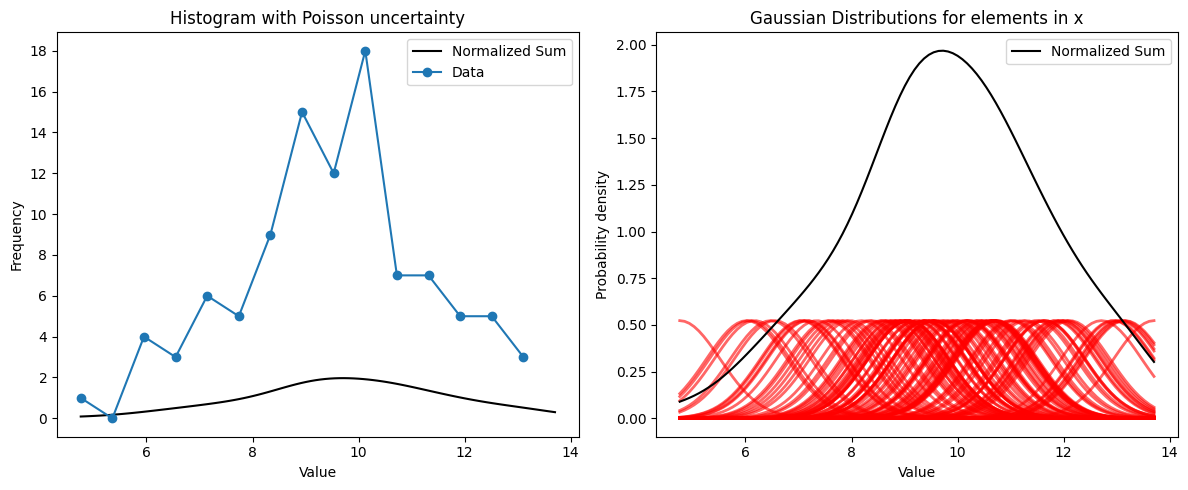

In [ ]:
#Setting seed for reproducibility
np.random.seed(42)

#Parameters
N = 100
mean_value = 10.0
std_dev = 2.0

#Generating the normally distributed data, saving it in x(np.array)
x = np.random.normal(mean_value, std_dev, N)

#Calculating the default standard deviation
default_std_dev = 1.06 * x.std() * N**(-1/5)

#Creating the Gaussian distributions for each element in x
gaussians = [norm(loc=value, scale=default_std_dev) for value in x]

#Plotting
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

#Setting labels and title for the original histogram
axes[0].set_xlabel('Value')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Histogram with Poisson uncertainty')

#Creating histogram with a proper value of bins
num_bins = 15
hist, bin_edges = np.histogram(x, bins=num_bins)

#Plotting original histogram as data points with errors
axes[0].errorbar(bin_edges[:-1], hist, fmt='o-', label='Data')
axes[0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))

#Setting labels and title for the Gaussian distributions
axes[1].set_xlabel('Value')
axes[1].set_ylabel('Probability density')
axes[1].set_title('Gaussian Distributions for elements in x')

#Plotting all Gaussian functions and saving them in a NumPy array
gaussian_array = np.zeros((len(gaussians), 100))
x_values = np.linspace(min(x), max(x), 100) 
for i, gaussian in enumerate(gaussians):
    gaussian_array[i, :] = gaussian.pdf(x_values)
    axes[1].plot(x_values, gaussian_array[i, :], 'r-', lw=2, alpha=0.6)

#Calculating the sum of Gaussian distributions along the rows
sum_gaussian_array = np.sum(gaussian_array, axis=0)

#Normalizing the sum to have the same mean and standard deviation as the original data, don't know if this is correct
sum_gaussian_array /= sum_gaussian_array.sum() * (x_values[1] - x_values[0])  #Normalizing to ensure the area under the curve is 1
sum_gaussian_array *= np.sum(hist) / np.sum(sum_gaussian_array)  #Scaling to match the sum of the original histogram

#Plotting the normalized sum of Gaussian functions in both plots
axes[0].plot(x_values, sum_gaussian_array, 'k-', label='Normalized Sum')
axes[0].legend()
axes[1].plot(x_values, sum_gaussian_array, 'k-', label='Normalized Sum')
axes[1].legend()

plt.tight_layout()
plt.show()

#I think i normalized the sum wrong, was not sure what to normalize it to...